In [783]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [784]:
link = "https://docs.google.com/spreadsheets/d/1AjPzzXDMNZGZPxpxC5qyYsg1vc5f_JD0uPceMAsbfQo/export?format=csv"
df = pd.read_csv(link)

In [785]:
df

,House ID,House Area,Number of rooms,Price
0,1,6274,8,2100
1,2,6689,5,2200
2,3,4276,8,1400
3,4,5130,9,1700
4,5,6035,6,2000
5,6,2946,1,1000
6,7,4727,10,1600
7,8,6873,7,2300
8,9,3911,4,1300
9,10,5689,5,1900


In [786]:
x = df[['House Area', 'Number of rooms']].to_numpy()
y = df['Price'].values.reshape(-1, 1)

In [787]:
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
x_final = (x - x_mean) / x_std

In [788]:
theta = np.zeros((x_final.shape[1], 1))
b = 0
learning_rate = 0.0025
epochs = 1600
print(theta)

[[0.]
 [0.]]


In [789]:
def cost_function(x, y, theta):
    predictions = []
    for i in range(len(x)):
        predictions.append(np.dot(x[i], theta) + b)
    predictions = np.array(predictions)
    cost = (1 / (2*len(y))) * np.sum((predictions - y)**2)
    return cost

In [790]:
def gradient_descent(x, y, theta, b, lr, epochs):
    m = len(y)
    cost = []
    for i in range(epochs):
        predictions = []
        for i in range(len(x)):
            predictions.append(np.dot(x[i], theta) + b)
        predictions = np.array(predictions)
        for i in range(len(theta)):
            gradient_theta_i = (1 / m) * (np.dot(x[:,i], (predictions - y)))
            theta[i] = theta[i] - lr * gradient_theta_i
        gradient_b = (1 / m) * np.sum(predictions - y)
        b = b - lr * gradient_b
        cost.append(cost_function(x, y, theta))

    return theta, b, cost

In [791]:
theta, b, cost = gradient_descent(x_final, y, theta, b, learning_rate, epochs)
print(theta, b)
print(cost[-1])

[[449.28294423]
 [  9.29122027]] 1718.1077600664098
1531439.4701846666


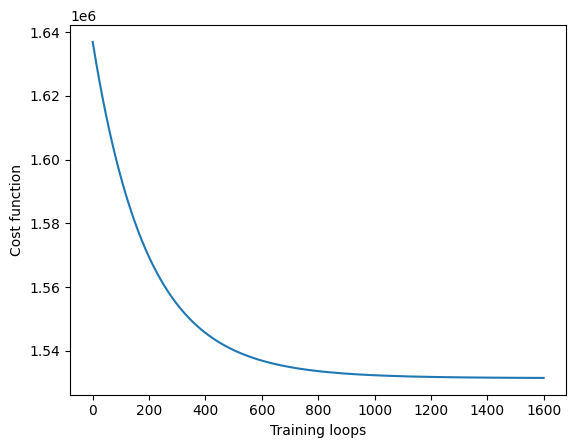

In [792]:
plt.plot(cost)
plt.xlabel("Training loops")
plt.ylabel("Cost function")
plt.savefig("cost.png")
plt.show()

In [793]:
def predict(area, rooms):
    x = np.array([area, rooms])
    x = (x - x_mean) / x_std
    return np.dot(x, theta) + b

In [794]:
predict(3000, 5)

array([978.87120298])

In [795]:
predict(10000, 10)

array([3275.80768562])

In [796]:
predict(3000, 12)

array([1006.03107698])

In [797]:
print("Price =", b, '+', theta[0][0], '*(Area) +', theta[1][0], "*(Number of rooms)")

Price = 1718.1077600664098 + 449.2829442312341 *(Area) + 9.29122026610073 *(Number of rooms)
